# Step 2: Data Collection & Understanding



## Import Libraries

In [ ]:
!pip install kagglehub

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

import os

## Load the dataset

In [ ]:
# Download the dataset from kaggle
path = kagglehub.dataset_download("emmanuelfwerr/thyroid-disease-data")
print("Path to dataset files:", path)

100%|██████████| 145k/145k [00:00<00:00, 27.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/emmanuelfwerr/thyroid-disease-data/versions/2


In [ ]:
# List files in the downloaded path
files_in_path = os.listdir(path)
print("Files in dataset path:", files_in_path)

Files in dataset path: ['thyroidDF.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, 'thyroidDF.csv'))

In [ ]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


## Data Analysis

### Descriptive Information of the data

In [ ]:
# Total Records and Features
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")

Total Records: 9,172
Total Features: 31


In [ ]:
# Column names and data types
col_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.count().values,
    'Null Count': df.isnull().sum().values
})
display(col_info)

,Column,Data Type,Non-Null Count,Null Count
0,age,int64,9172,0
1,sex,object,8865,307
2,on_thyroxine,object,9172,0
3,query_on_thyroxine,object,9172,0
4,on_antithyroid_meds,object,9172,0
5,sick,object,9172,0
6,pregnant,object,9172,0
7,thyroid_surgery,object,9172,0
8,I131_treatment,object,9172,0
9,query_hypothyroid,object,9172,0


In [ ]:
# Feature type breakdown
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumeric Features ({len(numeric_cols)}):")
for i, col in enumerate(numeric_cols, 1):
    print(f"  {i}. {col}")

print(f"\nCategorical Features ({len(categorical_cols)}):")
for i, col in enumerate(categorical_cols, 1):
    print(f"  {i}. {col}")

print(f"\nSummary:")
print(f"- Numeric: {len(numeric_cols)} features")
print(f"- Categorical: {len(categorical_cols)} features")
print(f"- Total: {len(numeric_cols) + len(categorical_cols)} features")


Numeric Features (8):
  1. age
  2. TSH
  3. T3
  4. TT4
  5. T4U
  6. FTI
  7. TBG
  8. patient_id

Categorical Features (23):
  1. sex
  2. on_thyroxine
  3. query_on_thyroxine
  4. on_antithyroid_meds
  5. sick
  6. pregnant
  7. thyroid_surgery
  8. I131_treatment
  9. query_hypothyroid
  10. query_hyperthyroid
  11. lithium
  12. goitre
  13. tumor
  14. hypopituitary
  15. psych
  16. TSH_measured
  17. T3_measured
  18. TT4_measured
  19. T4U_measured
  20. FTI_measured
  21. TBG_measured
  22. referral_source
  23. target

Summary:
- Numeric: 8 features
- Categorical: 23 features
- Total: 31 features


### Target Class Analysis

Total Unique Classes: 32
Class Distribution:


,Count,Percentage
target,,
-,6771,73.822503
K,436,4.753598
G,359,3.914086
I,346,3.772351
F,233,2.540340
R,196,2.136939
A,147,1.602704
L,115,1.253816
M,111,1.210205



Class Imbalance Analysis:
- Negative class (-): 6,771 (73.82%)
- All disease classes: 2,401 (26.18%)
- Imbalance ratio: 2.82:1


Text(0.5, 1.0, 'Target Class for Stage 1 Classification - Healthy (Negative Thyroid) vs Disease')

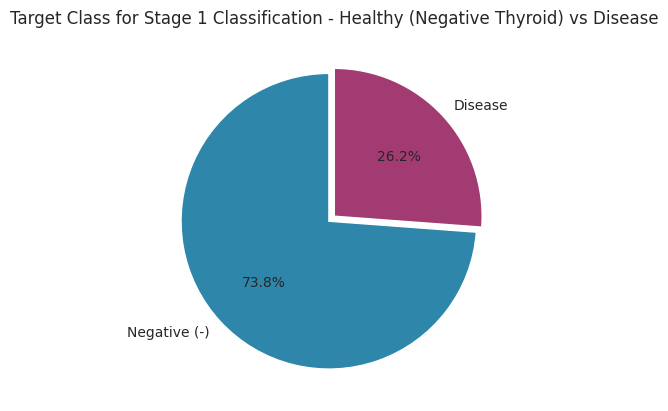

In [ ]:
# Target variable distribution
target_counts = df['target'].value_counts()
target_pct = df['target'].value_counts(normalize=True) * 100

print(f"Total Unique Classes: {df['target'].nunique()}")
print(f"Class Distribution:")

target_summary = pd.DataFrame({
    'Count': target_counts,
    'Percentage': target_pct
})
display(target_summary.head(15))  # Show top 15 classes

print(f"\nClass Imbalance Analysis:")
print(f"- Negative class (-): {target_counts['-']:,} ({target_pct['-']:.2f}%)")
print(f"- All disease classes: {df.shape[0] - target_counts['-']:,} ({100 - target_pct['-']:.2f}%)")
print(f"- Imbalance ratio: {target_pct['-'] / (100 - target_pct['-']):.2f}:1")

negative_count = (df['target'] == '-').sum()
positive_count = len(df) - negative_count
colors_pie = ['#2E86AB', '#A23B72']
plt.pie([negative_count, positive_count],
               labels=['Negative (-)', 'Disease'],
               autopct='%1.1f%%',
               startangle=90,
               colors=colors_pie,
               explode=(0.05, 0))
plt.title('Target Class for Stage 1 Classification - Healthy (Negative Thyroid) vs Disease')

In [ ]:
# Disease category grouping

# Define disease groups
target_groups = {
    'Negative (Healthy)': ['-'],
    'Hyperthyroid Primary': ['A', 'B', 'C', 'D'],
    'Hypothyroid Primary': ['E', 'F', 'G', 'H'],
    'Compensated Hypothyroid': ['I', 'J', 'K', 'L'],
    'Secondary Conditions': ['M', 'N', 'O', 'P'],
    'Other Conditions': ['Q', 'R', 'S', 'T'],
    'Combined Conditions': ['AK', 'GK', 'FK', 'MK', 'KJ', 'GI', 'C|I', 'H|K', 'MI', 'LJ', 'GKJ', 'OI', 'D|R']
}

group_summary = []
for group_name, codes in target_groups.items():
    count = df[df['target'].isin(codes)].shape[0]
    pct = (count / len(df)) * 100
    group_summary.append({
        'Disease Category': group_name,
        'Count': count,
        'Percentage': f"{pct:.2f}%"
    })

group_df = pd.DataFrame(group_summary)
display(group_df)

,Disease Category,Count,Percentage
0,Negative (Healthy),6771,73.82%
1,Hyperthyroid Primary,182,1.98%
2,Hypothyroid Primary,593,6.47%
3,Compensated Hypothyroid,927,10.11%
4,Secondary Conditions,240,2.62%
5,Other Conditions,295,3.22%
6,Combined Conditions,164,1.79%


/tmp/ipython-input-2018548504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Disease Category', y='Count', data=group_df, palette='viridis')


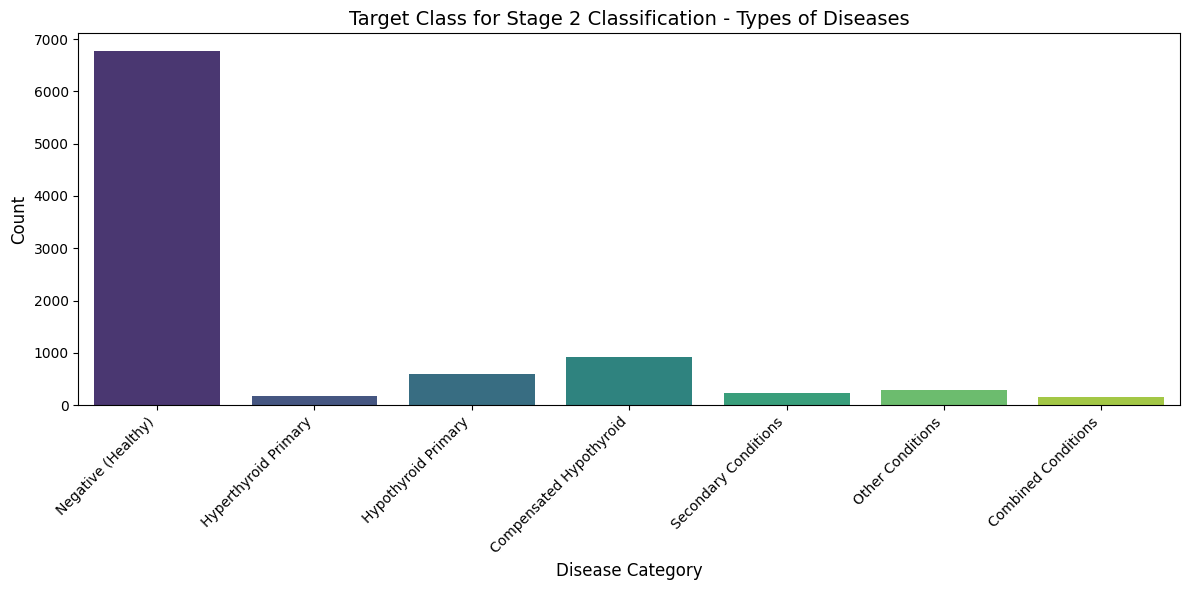

In [ ]:
fig = plt.figure(figsize=(12, 6))
sns.barplot(x='Disease Category', y='Count', data=group_df, palette='viridis')
plt.title('Target Class for Stage 2 Classification - Types of Diseases', fontsize=14)
plt.xlabel('Disease Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Statistic Summary of the data

In [ ]:
# Detailed statistics for all numeric features
print("NUMERIC FEATURES - DETAILED STATISTICS")

numeric_features = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
df[numeric_features].describe().T

NUMERIC FEATURES - DETAILED STATISTICS


,count,mean,std,min,25%,50%,75%,max
age,9172.0,73.555822,1183.976718,1.000,37.00,55.00,68.000,65526.00
TSH,8330.0,5.218403,24.184006,0.005,0.46,1.40,2.700,530.00
T3,6568.0,1.970629,0.887579,0.050,1.50,1.90,2.300,18.00
TT4,8730.0,108.700305,37.522670,2.000,87.00,104.00,126.000,600.00
T4U,8363.0,0.976056,0.200360,0.170,0.86,0.96,1.065,2.33
FTI,8370.0,113.640746,41.551650,1.400,93.00,109.00,128.000,881.00
TBG,349.0,29.870057,21.080504,0.100,21.00,26.00,31.000,200.00


In [ ]:
# Detailed statistics for all categorical features
print("CATEGORICAL FEATURES - DETAILED STATISTICS")

df.describe(include="O").T

CATEGORICAL FEATURES - DETAILED STATISTICS


,count,unique,top,freq
sex,8865,2,F,6073
on_thyroxine,9172,2,f,7932
query_on_thyroxine,9172,2,f,9019
on_antithyroid_meds,9172,2,f,9056
sick,9172,2,f,8828
pregnant,9172,2,f,9065
thyroid_surgery,9172,2,f,9038
I131_treatment,9172,2,f,9003
query_hypothyroid,9172,2,f,8542
query_hyperthyroid,9172,2,f,8521


### Data Quality Analysis: Missing Values, Outliers, Distributions etc

#### Missing Values

In [ ]:
# Identify Missing Data

missing_counts = df.isnull().sum()
missing_pct = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Feature': df.columns,
    'Missing Count': missing_counts.values,
    'Missing Percentage': missing_pct.values,
    'Non-Missing': df.count().values
}).sort_values('Missing Count', ascending=False)

# Filter to show only features with missing data
missing_features = missing_df[missing_df['Missing Count'] > 0]

print(f"Features with Missing Data: {len(missing_features)}")
print(f"Features with NO Missing Data: {len(missing_df) - len(missing_features)}")
print("Detailed Missing Data Report:")
display(missing_features)



Features with Missing Data: 7
Features with NO Missing Data: 24
Detailed Missing Data Report:


,Feature,Missing Count,Missing Percentage,Non-Missing
27,TBG,8823,96.194941,349
19,T3,2604,28.390754,6568
17,TSH,842,9.180113,8330
23,T4U,809,8.820323,8363
25,FTI,802,8.744003,8370
21,TT4,442,4.819014,8730
1,sex,307,3.347143,8865


#### Age Outlier Analysis

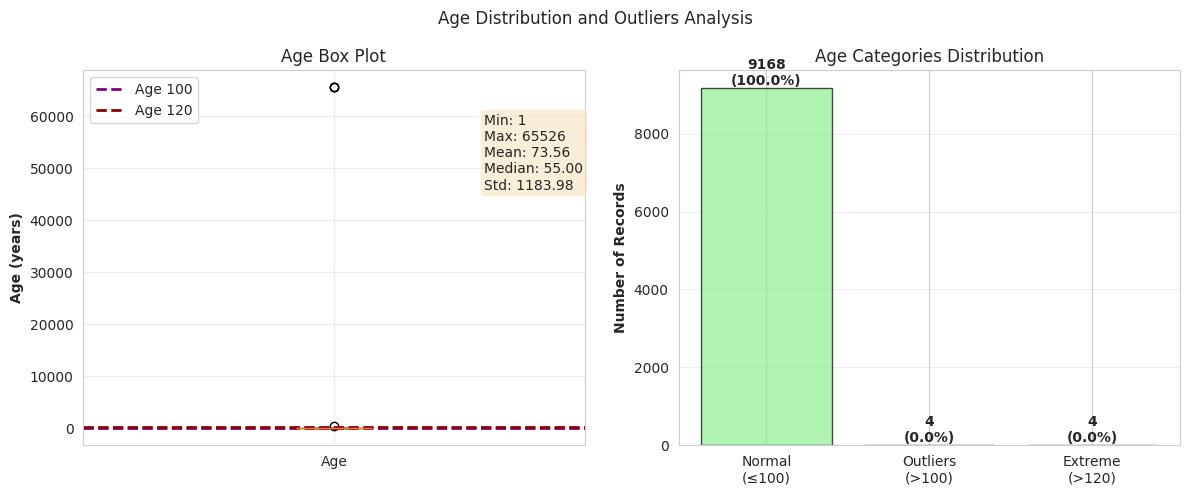

In [ ]:
# Age distribution analysis
# Set style
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Age Distribution and Outliers Analysis', fontsize=12)

# Box Plot
ax1 = axes[0]
box_data = ax1.boxplot(df['age'], vert=True, patch_artist=True)
box_data['boxes'][0].set_facecolor('lightblue')
ax1.axhline(100, color='purple', linestyle='--', linewidth=2, label='Age 100')
ax1.axhline(120, color='darkred', linestyle='--', linewidth=2, label='Age 120')
ax1.set_ylabel('Age (years)', fontweight='bold')
ax1.set_title('Age Box Plot')
ax1.set_xticklabels(['Age'])
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add statistics text
stats_text = f"Min: {df['age'].min()}\nMax: {df['age'].max()}\nMean: {df['age'].mean():.2f}\nMedian: {df['age'].median():.2f}\nStd: {df['age'].std():.2f}"
ax1.text(1.3, df['age'].max() * 0.7, stats_text, fontsize=10,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Outlier Categories (Bar Chart)
ax2 = axes[1]
outliers_100 = df[df['age'] > 100]
outliers_120 = df[df['age'] > 120]
normal_age = df[df['age'] <= 100]

categories = ['Normal\n(≤100)', 'Outliers\n(>100)', 'Extreme\n(>120)']
counts = [len(normal_age), len(outliers_100), len(outliers_120)]
colors_bar = ['lightgreen', 'orange', 'red']

bars = ax2.bar(categories, counts, color=colors_bar, edgecolor='black', alpha=0.7)
ax2.set_ylabel('Number of Records', fontweight='bold')
ax2.set_title('Age Categories Distribution')
ax2.grid(True, alpha=0.3, axis='y')

# Add count labels on bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}\n({count/len(df)*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

#### Sex Distribution Analysis

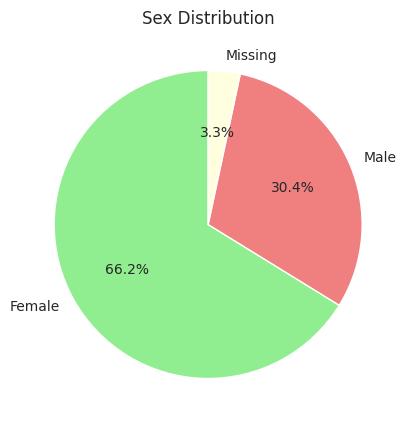

In [ ]:
# Sex distribution and missing values
sex_counts = df['sex'].value_counts(dropna=False)

# Prepare data for pie chart
labels = ['Female', 'Male', 'Missing']
sizes = [sex_counts.get('F', 0), sex_counts.get('M', 0), sex_counts.get(np.nan, 0)]
colors = ['lightgreen', 'lightcoral', 'lightyellow']

plt.figure(figsize=(6, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sex Distribution', fontsize=12)
plt.show()

#### Laboratory Test Measurements Outliers


TSH

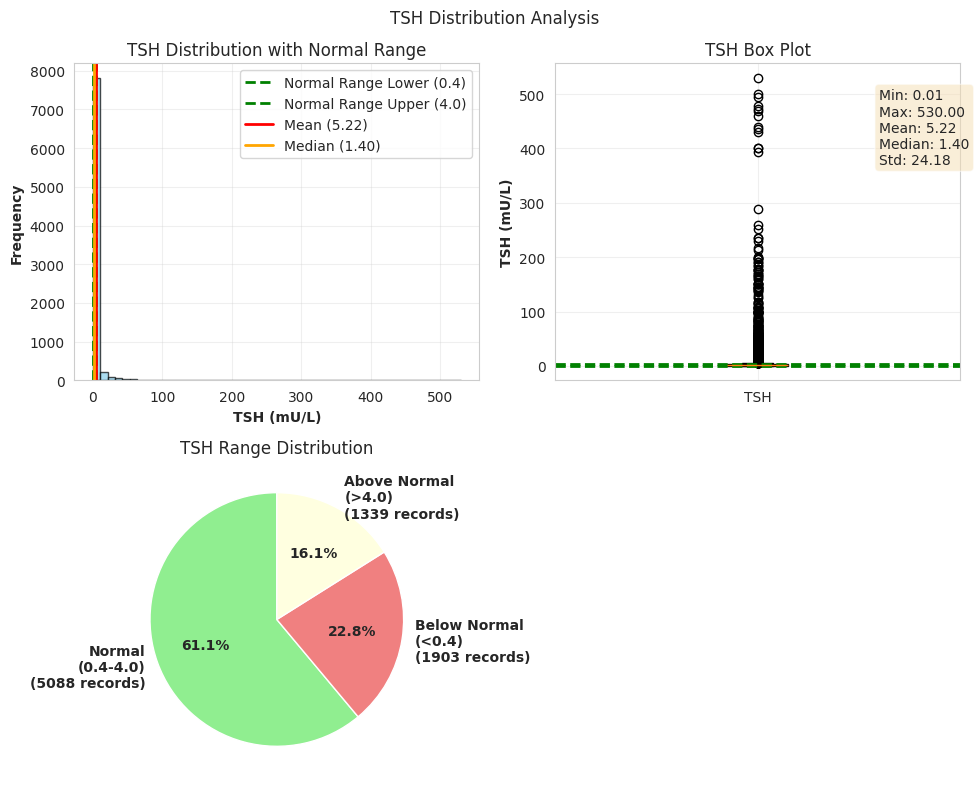

In [ ]:
#TSH distribution analysis
# Set style
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('TSH Distribution Analysis', fontsize=12)

# 1. Distribution Histogram with Normal Range
ax1 = axes[0, 0]
tsh_valid = df['TSH'].dropna()
ax1.hist(tsh_valid, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax1.axvline(0.4, color='green', linestyle='--', linewidth=2, label='Normal Range Lower (0.4)')
ax1.axvline(4.0, color='green', linestyle='--', linewidth=2, label='Normal Range Upper (4.0)')
ax1.axvline(tsh_valid.mean(), color='red', linestyle='-', linewidth=2, label=f'Mean ({tsh_valid.mean():.2f})')
ax1.axvline(tsh_valid.median(), color='orange', linestyle='-', linewidth=2, label=f'Median ({tsh_valid.median():.2f})')
ax1.set_xlabel('TSH (mU/L)', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('TSH Distribution with Normal Range')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Box Plot
ax2 = axes[0, 1]
box_data = ax2.boxplot(tsh_valid, vert=True, patch_artist=True)
box_data['boxes'][0].set_facecolor('lightblue')
ax2.axhline(0.4, color='green', linestyle='--', linewidth=2, label='Normal Range')
ax2.axhline(4.0, color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('TSH (mU/L)', fontweight='bold')
ax2.set_title('TSH Box Plot')
ax2.set_xticklabels(['TSH'])
ax2.grid(True, alpha=0.3)

# Add statistics text
stats_text = f"Min: {tsh_valid.min():.2f}\nMax: {tsh_valid.max():.2f}\nMean: {tsh_valid.mean():.2f}\nMedian: {tsh_valid.median():.2f}\nStd: {tsh_valid.std():.2f}"
ax2.text(1.3, tsh_valid.max() * 0.7, stats_text, fontsize=10,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 3. Category Distribution (Pie Chart)
ax3 = axes[1, 0]
normal_tsh = tsh_valid[(tsh_valid >= 0.4) & (tsh_valid <= 4.0)]
below_normal = tsh_valid[tsh_valid < 0.4]
above_normal = tsh_valid[tsh_valid > 4.0]

categories = ['Normal\n(0.4-4.0)', 'Below Normal\n(<0.4)', 'Above Normal\n(>4.0)']
counts = [len(normal_tsh), len(below_normal), len(above_normal)]
percentages = [c/len(tsh_valid)*100 for c in counts]

colors = ['lightgreen', 'lightcoral', 'lightyellow']
wedges, texts, autotexts = ax3.pie(counts, labels=categories, autopct='%1.1f%%',
                                     colors=colors, startangle=90, textprops={'fontweight': 'bold'})
ax3.set_title('TSH Range Distribution')

# Add count labels
for i, (count, pct) in enumerate(zip(counts, percentages)):
    texts[i].set_text(f'{categories[i]}\n({count} records)')

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

T3

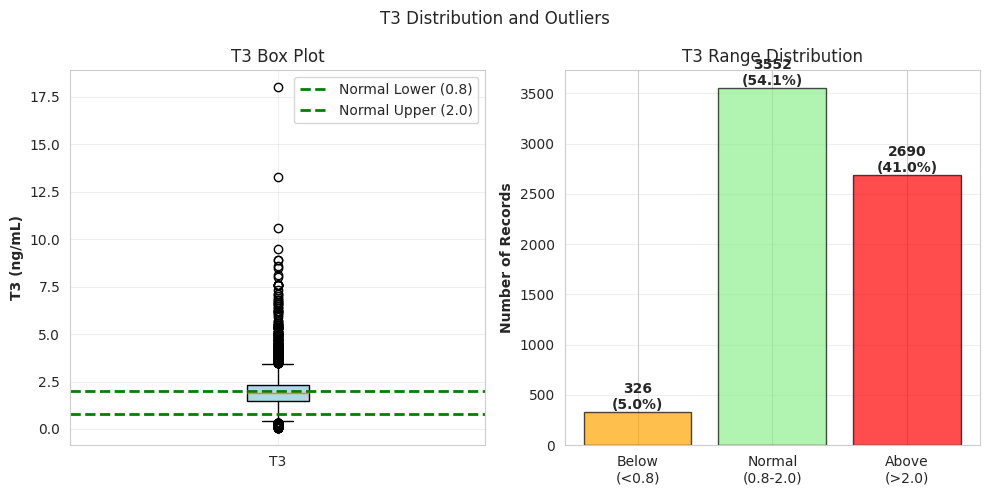


T3 Statistics:
  Range: 0.05 - 18.00 ng/mL
  Missing: 2604 (28.4%)


In [ ]:
# T3 Outliers Analysis
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('T3 Distribution and Outliers', fontsize=12)

# Box Plot
t3_valid = df['T3'].dropna()
ax1 = axes[0]
box_data = ax1.boxplot(t3_valid, vert=True, patch_artist=True)
box_data['boxes'][0].set_facecolor('lightblue')
ax1.axhline(0.8, color='green', linestyle='--', linewidth=2, label='Normal Lower (0.8)')
ax1.axhline(2.0, color='green', linestyle='--', linewidth=2, label='Normal Upper (2.0)')
ax1.set_ylabel('T3 (ng/mL)', fontweight='bold')
ax1.set_title('T3 Box Plot')
ax1.set_xticklabels(['T3'])
ax1.legend()
ax1.grid(True, alpha=0.3)

# Range Categories
ax2 = axes[1]
below_normal = t3_valid[t3_valid < 0.8]
normal = t3_valid[(t3_valid >= 0.8) & (t3_valid <= 2.0)]
above_normal = t3_valid[t3_valid > 2.0]

categories = ['Below\n(<0.8)', 'Normal\n(0.8-2.0)', 'Above\n(>2.0)']
counts = [len(below_normal), len(normal), len(above_normal)]
colors = ['orange', 'lightgreen', 'red']

bars = ax2.bar(categories, counts, color=colors, edgecolor='black', alpha=0.7)
ax2.set_ylabel('Number of Records', fontweight='bold')
ax2.set_title('T3 Range Distribution')
ax2.grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}\n({count/len(t3_valid)*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nT3 Statistics:")
print(f"  Range: {t3_valid.min():.2f} - {t3_valid.max():.2f} ng/mL")
print(f"  Missing: {df['T3'].isna().sum()} ({df['T3'].isna().sum()/len(df)*100:.1f}%)")

TT4

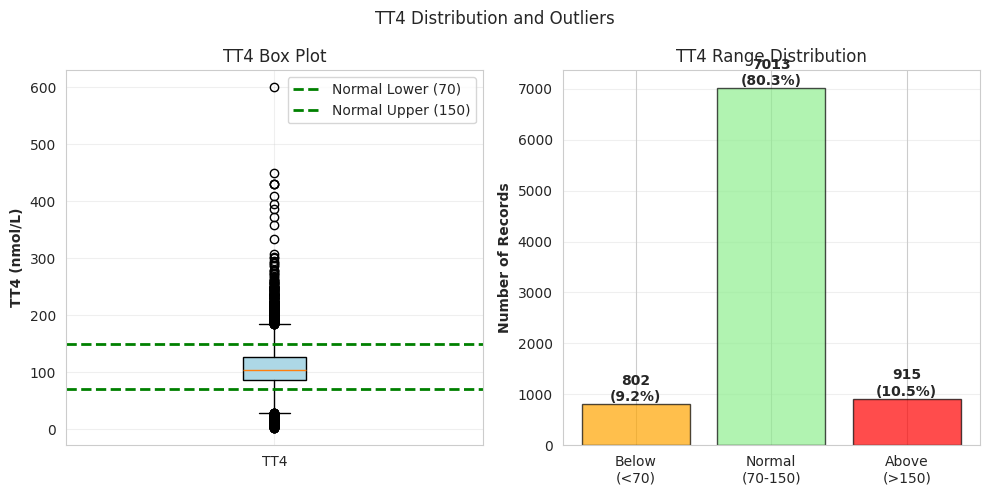


TT4 Statistics:
  Range: 2.00 - 600.00 nmol/L
  Mean: 108.70, Std: 37.52
  Missing: 442 (4.8%)


In [ ]:
# TT4 Range Analysis
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('TT4 Distribution and Outliers', fontsize=12)

# Box Plot
tt4_valid = df['TT4'].dropna()
ax1 = axes[0]
box_data = ax1.boxplot(tt4_valid, vert=True, patch_artist=True)
box_data['boxes'][0].set_facecolor('lightblue')
ax1.axhline(70, color='green', linestyle='--', linewidth=2, label='Normal Lower (70)')
ax1.axhline(150, color='green', linestyle='--', linewidth=2, label='Normal Upper (150)')
ax1.set_ylabel('TT4 (nmol/L)', fontweight='bold')
ax1.set_title('TT4 Box Plot')
ax1.set_xticklabels(['TT4'])
ax1.legend()
ax1.grid(True, alpha=0.3)

# Range Categories
ax2 = axes[1]
below_normal = tt4_valid[tt4_valid < 70]
normal = tt4_valid[(tt4_valid >= 70) & (tt4_valid <= 150)]
above_normal = tt4_valid[tt4_valid > 150]

categories = ['Below\n(<70)', 'Normal\n(70-150)', 'Above\n(>150)']
counts = [len(below_normal), len(normal), len(above_normal)]
colors = ['orange', 'lightgreen', 'red']

bars = ax2.bar(categories, counts, color=colors, edgecolor='black', alpha=0.7)
ax2.set_ylabel('Number of Records', fontweight='bold')
ax2.set_title('TT4 Range Distribution')
ax2.grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}\n({count/len(tt4_valid)*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nTT4 Statistics:")
print(f"  Range: {tt4_valid.min():.2f} - {tt4_valid.max():.2f} nmol/L")
print(f"  Mean: {tt4_valid.mean():.2f}, Std: {tt4_valid.std():.2f}")
print(f"  Missing: {df['TT4'].isna().sum()} ({df['TT4'].isna().sum()/len(df)*100:.1f}%)")

T4U

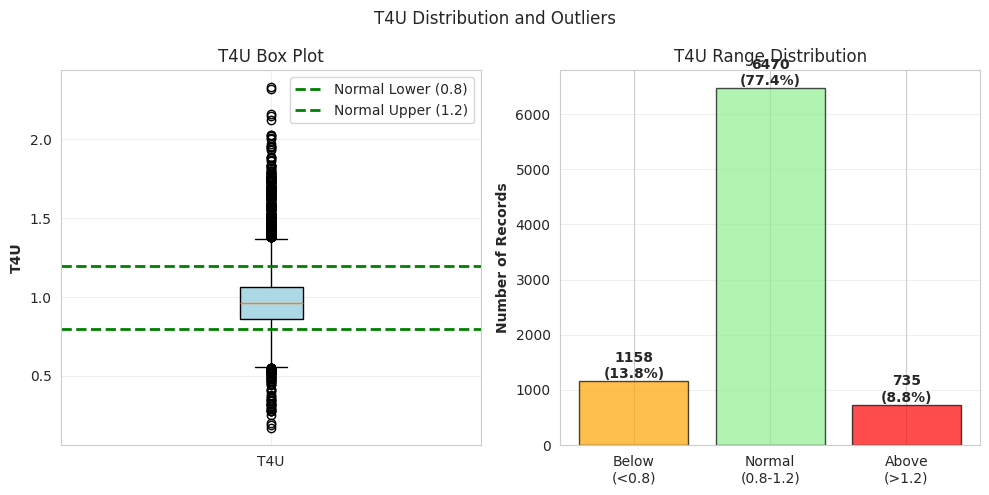


T4U Statistics:
  Range: 0.17 - 2.33
  Missing: 809 (8.8%)


In [ ]:
# T4U Range Analysis
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('T4U Distribution and Outliers', fontsize=12)

# Box Plot
t4u_valid = df['T4U'].dropna()
ax1 = axes[0]
box_data = ax1.boxplot(t4u_valid, vert=True, patch_artist=True)
box_data['boxes'][0].set_facecolor('lightblue')
ax1.axhline(0.8, color='green', linestyle='--', linewidth=2, label='Normal Lower (0.8)')
ax1.axhline(1.2, color='green', linestyle='--', linewidth=2, label='Normal Upper (1.2)')
ax1.set_ylabel('T4U', fontweight='bold')
ax1.set_title('T4U Box Plot')
ax1.set_xticklabels(['T4U'])
ax1.legend()
ax1.grid(True, alpha=0.3)

# Range Categories
ax2 = axes[1]
below_normal = t4u_valid[t4u_valid < 0.8]
normal = t4u_valid[(t4u_valid >= 0.8) & (t4u_valid <= 1.2)]
above_normal = t4u_valid[t4u_valid > 1.2]

categories = ['Below\n(<0.8)', 'Normal\n(0.8-1.2)', 'Above\n(>1.2)']
counts = [len(below_normal), len(normal), len(above_normal)]
colors = ['orange', 'lightgreen', 'red']

bars = ax2.bar(categories, counts, color=colors, edgecolor='black', alpha=0.7)
ax2.set_ylabel('Number of Records', fontweight='bold')
ax2.set_title('T4U Range Distribution')
ax2.grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{count}\n({count/len(t4u_valid)*100:.1f}%)',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nT4U Statistics:")
print(f"  Range: {t4u_valid.min():.2f} - {t4u_valid.max():.2f}")
print(f"  Missing: {df['T4U'].isna().sum()} ({df['T4U'].isna().sum()/len(df)*100:.1f}%)")

FTI

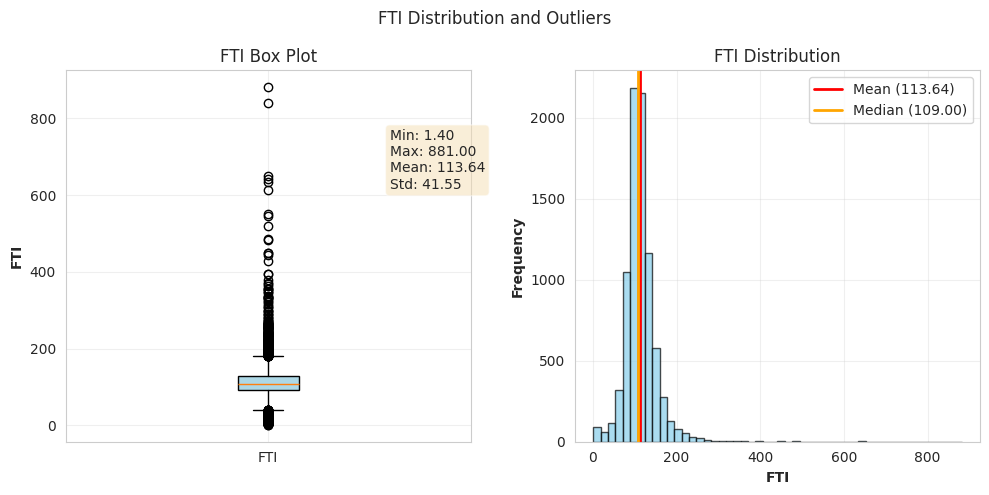


FTI Statistics:
  Range: 1.40 - 881.00
  Mean: 113.64, Std: 41.55
  Missing: 802 (8.7%)


In [ ]:
# FTI Outliers Analysis
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('FTI Distribution and Outliers', fontsize=12)

# Box Plot
fti_valid = df['FTI'].dropna()
ax1 = axes[0]
box_data = ax1.boxplot(fti_valid, vert=True, patch_artist=True)
box_data['boxes'][0].set_facecolor('lightblue')
ax1.set_ylabel('FTI', fontweight='bold')
ax1.set_title('FTI Box Plot')
ax1.set_xticklabels(['FTI'])
ax1.grid(True, alpha=0.3)

stats_text = f"Min: {fti_valid.min():.2f}\nMax: {fti_valid.max():.2f}\nMean: {fti_valid.mean():.2f}\nStd: {fti_valid.std():.2f}"
ax1.text(1.3, fti_valid.max() * 0.7, stats_text, fontsize=10,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Histogram
ax2 = axes[1]
ax2.hist(fti_valid, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax2.axvline(fti_valid.mean(), color='red', linestyle='-', linewidth=2, label=f'Mean ({fti_valid.mean():.2f})')
ax2.axvline(fti_valid.median(), color='orange', linestyle='-', linewidth=2, label=f'Median ({fti_valid.median():.2f})')
ax2.set_xlabel('FTI', fontweight='bold')
ax2.set_ylabel('Frequency', fontweight='bold')
ax2.set_title('FTI Distribution')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFTI Statistics:")
print(f"  Range: {fti_valid.min():.2f} - {fti_valid.max():.2f}")
print(f"  Mean: {fti_valid.mean():.2f}, Std: {fti_valid.std():.2f}")
print(f"  Missing: {df['FTI'].isna().sum()} ({df['FTI'].isna().sum()/len(df)*100:.1f}%)")

TBG

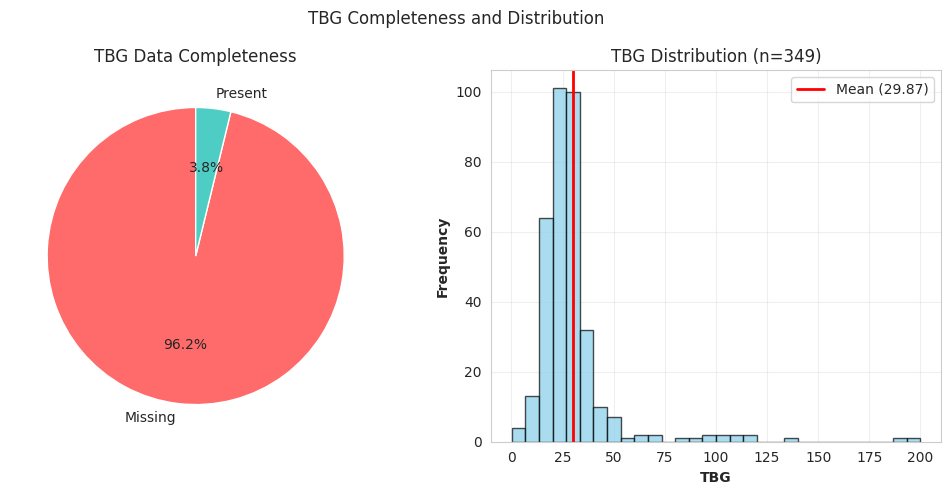


TBG Statistics:
  Present: 349 (3.8%)
  Missing: 8823 (96.2%)
  Range: 0.10 - 200.00
  Mean: 29.87


In [ ]:
# TBG Missingness Analysis
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('TBG Completeness and Distribution', fontsize=12)

# Completeness Pie Chart
ax1 = axes[0]
tbg_missing = df['TBG'].isna().sum()
tbg_present = df['TBG'].notna().sum()

labels = ['Missing', 'Present']
sizes = [tbg_missing, tbg_present]
colors = ['#FF6B6B', '#4ECDC4']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.set_title('TBG Data Completeness')

# Distribution of Available Values
ax2 = axes[1]
tbg_valid = df['TBG'].dropna()
if len(tbg_valid) > 0:
    ax2.hist(tbg_valid, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    ax2.axvline(tbg_valid.mean(), color='red', linestyle='-', linewidth=2, label=f'Mean ({tbg_valid.mean():.2f})')
    ax2.set_xlabel('TBG', fontweight='bold')
    ax2.set_ylabel('Frequency', fontweight='bold')
    ax2.set_title(f'TBG Distribution (n={len(tbg_valid)})')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTBG Statistics:")
print(f"  Present: {tbg_present} ({tbg_present/len(df)*100:.1f}%)")
print(f"  Missing: {tbg_missing} ({tbg_missing/len(df)*100:.1f}%)")
if len(tbg_valid) > 0:
    print(f"  Range: {tbg_valid.min():.2f} - {tbg_valid.max():.2f}")
    print(f"  Mean: {tbg_valid.mean():.2f}")

#### Feature Correlation and Multicollinearity


Correlation Matrix Analysis


In [ ]:
numeric_cols_for_corr = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
corr_data = df[numeric_cols_for_corr].dropna()

correlation_matrix = corr_data.corr()
display(correlation_matrix)


,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,-0.085545,0.098296,0.111688,-0.047399,0.107894,0.022616
TSH,-0.085545,1.000000,-0.110534,-0.215734,-0.202297,-0.148666,-0.118139
T3,0.098296,-0.110534,1.000000,0.658678,-0.015995,0.659975,-0.014327
TT4,0.111688,-0.215734,0.658678,1.000000,0.124051,0.943404,0.082144
T4U,-0.047399,-0.202297,-0.015995,0.124051,1.000000,-0.200470,0.679279
FTI,0.107894,-0.148666,0.659975,0.943404,-0.200470,1.000000,-0.143306
TBG,0.022616,-0.118139,-0.014327,0.082144,0.679279,-0.143306,1.000000


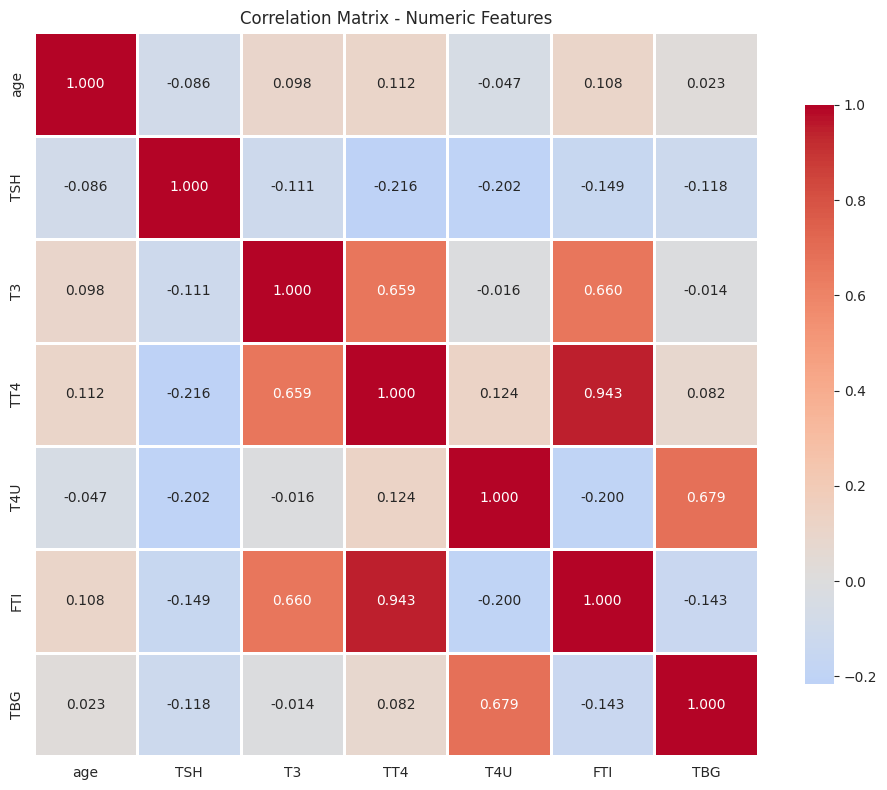

Correlation matrix saved as 'Correlation_Matrix.png'


In [ ]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title('Correlation Matrix - Numeric Features', fontsize=12)
plt.tight_layout()
plt.savefig('Correlation_Matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Correlation matrix saved as 'Correlation_Matrix.png'")

TT4 and FTI Correlation


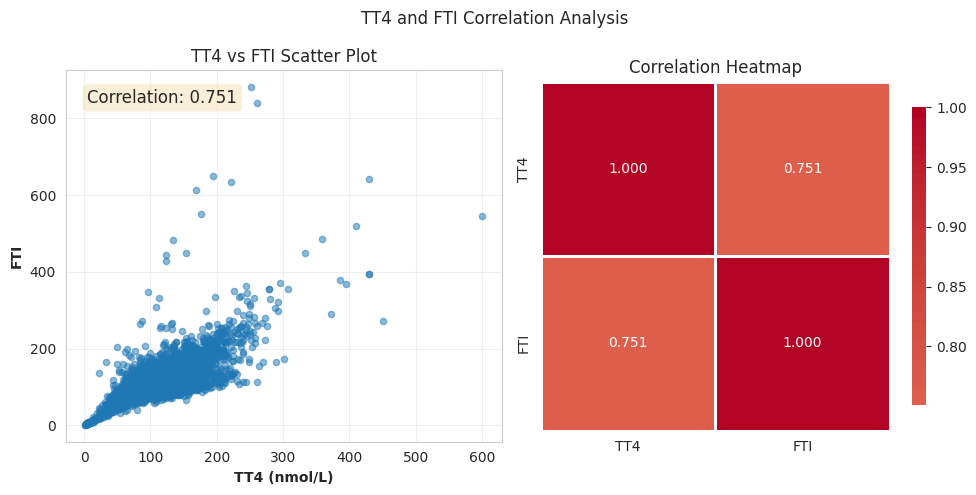


Correlation Analysis:
  TT4 and FTI correlation: 0.751
  High correlation (r > 0.9) may cause multicollinearity


In [ ]:
# Feature Correlation: TT4 and FTI
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('TT4 and FTI Correlation Analysis', fontsize=12)

# Scatter Plot
ax1 = axes[0]
valid_data = df[['TT4', 'FTI']].dropna()
ax1.scatter(valid_data['TT4'], valid_data['FTI'], alpha=0.5, s=20)
ax1.set_xlabel('TT4 (nmol/L)', fontweight='bold')
ax1.set_ylabel('FTI', fontweight='bold')
ax1.set_title('TT4 vs FTI Scatter Plot')
ax1.grid(True, alpha=0.3)

# Calculate and display correlation
correlation = valid_data['TT4'].corr(valid_data['FTI'])
ax1.text(0.05, 0.95, f'Correlation: {correlation:.3f}',
         transform=ax1.transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Correlation Heatmap
ax2 = axes[1]
corr_matrix = valid_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax2)
ax2.set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()

print(f"\nCorrelation Analysis:")
print(f"  TT4 and FTI correlation: {correlation:.3f}")
print(f"  High correlation (r > 0.9) may cause multicollinearity")

#### Categorical Feature Imbalance

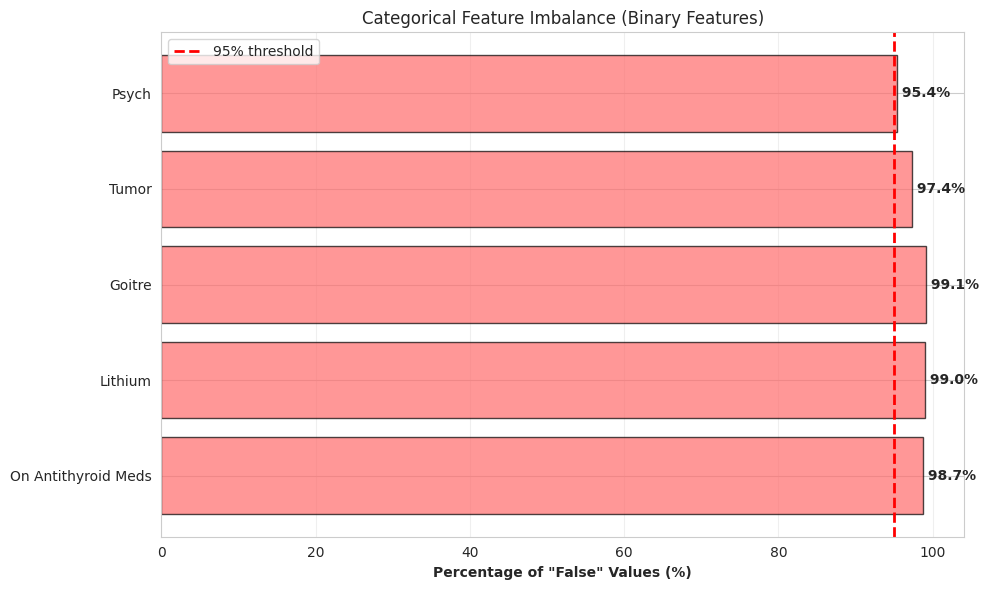


Categorical Feature Imbalance:
  On Antithyroid Meds: 98.7% false
  Lithium: 99.0% false
  Goitre: 99.1% false
  Tumor: 97.4% false
  Psych: 95.4% false


In [ ]:
# Categorical Feature Imbalance
binary_features = ['on_antithyroid_meds', 'lithium', 'goitre', 'tumor', 'psych']
false_percentages = []
feature_names = []

for feature in binary_features:
    false_count = (df[feature] == 'f').sum()
    false_pct = false_count / len(df) * 100
    false_percentages.append(false_pct)
    feature_names.append(feature.replace('_', ' ').title())

fig, ax = plt.subplots(figsize=(10, 6))
colors_imbalance = ['#FF6B6B' if p > 95 else '#FFE66D' for p in false_percentages]
bars = ax.barh(feature_names, false_percentages, color=colors_imbalance, edgecolor='black', alpha=0.7)
ax.set_xlabel('Percentage of "False" Values (%)', fontweight='bold')
ax.set_title('Categorical Feature Imbalance (Binary Features)', fontsize=12)
ax.grid(True, alpha=0.3, axis='x')
ax.axvline(95, color='red', linestyle='--', linewidth=2, label='95% threshold')
ax.legend()

for bar, pct in zip(bars, false_percentages):
    ax.text(pct, bar.get_y() + bar.get_height()/2., f' {pct:.1f}%',
            ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nCategorical Feature Imbalance:")
for feat, pct in zip(feature_names, false_percentages):
    print(f"  {feat}: {pct:.1f}% false")